# AST1420 - Assignment 1
## Emaad Paracha - 1003687236

In [1]:
import matplotlib.pyplot as plt
import math
from galpy.orbit import Orbit
import astropy.units as u
import astropy.constants as const
from galpy import potential
from scipy.integrate import odeint
from scipy.integrate import quad
from scipy.misc import derivative
from galpy.potential import MWPotential2014
from galpy.potential import NFWPotential
import numpy as np
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore") #Not ideal, I just wanted to make the notebook cleaner

## Question 1

### Part a

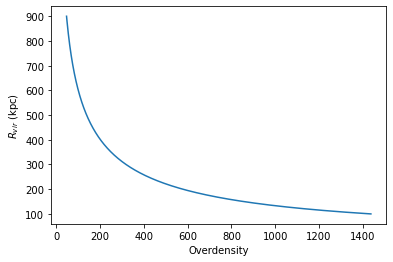

In [2]:
p0 = 0.0035 #Msun/pc^-3
a = 16*(10*3) #pc
H0 = 70/(10**6) #km/s/pc
G = 4.3*(10**-3) #pc*(km/s)^2/Msun
pcrit = ((3*(H0**2))/(8*math.pi*G)) 

rvir = []
i = 1
while i < (9):
    rvir.append(i*(10**2))
    i += 0.01
    
delta = []
for r in rvir:
    c = r/a
    overdensity = (((3*(p0))/(c**3))*((math.log(1+c)) - ((c)/(1+c))))/(pcrit*100)
    delta.append(overdensity)
    
plt.plot(delta,rvir)

plt.xlabel("Overdensity")
plt.ylabel("$R_{vir}$ (kpc)")
plt.show()

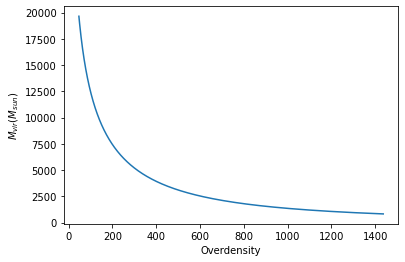

In [3]:
Mvir = []

for m in range(len(rvir)):
    solveforM = ((4*math.pi*(rvir[m]**3))/3)*pcrit*delta[m]
    Mvir.append(solveforM)
    
plt.plot(delta,Mvir)

plt.xlabel("Overdensity")
plt.ylabel("$M_{vir} (M_{sun})$")
plt.show()

The figures above show an exponential decay type relationship for both virial mass $(M_{vir})$ and virial radius $(R_{vir})$ with the overdensity $(\Delta_{v})$, with lower the mass and radius, we get greater the value for overdensity.

### Part b

We can see that both $M_{vir}$ and $R_{vir}$ have a similar (exponential decay) relationship with $\Delta_{v}$, and that can be explained with Equation 3.66 from the notes:

$$M_{vir} = \frac{4\pi r^{3}_{vir}}{3}\Delta_{v}\rho_{crit}$$

Where it can be seen they roughly have a similar relationship to $\Delta_{v}$

As for the exponential decay relationship, we can observe that if we write the formula for $\Delta_{v}$, we have an $\ln(1+c)$ term, where $c = r_{vir}/a$:

$$\Delta_{v} = \frac{3\rho_{0}}{c^{3}\rho_{crit}}(\ln(1+c) - \frac{c}{1+c})$$

Since $c$ depends on $r_{vir}$, to completely isolate and solve for $r_{vir}$, we would need to take the exponential of $\Delta_{v}$ (and other terms), leading to exponential decay relationship we see in the graphs above. And since $M_{vir}$ behaves similarly, the same argument applies.

## Question 2

### Part a

#### Offsetting Radial Velocity

Pericenter Radius
vR = 1, Pericenter Radius: 0.9503957648372099
vR += 0.1, Pericenter Radius: 0.9425269526327986
vR += 0.15, Pericenter Radius: 0.9244618569731116

Apocenter Radius
vR = 1, Apocenter Radius: 1.0685278215971221
vR += 0.1, Apocenter Radius: 1.0780346815084785
vR += 0.15, Apocenter Radius: 1.100824874370705

Eccentricity
vR = 1, Eccentricity: 0.05851239618659763
vR += 0.1, Eccentricity: 0.06706438773557609
vR += 0.15, Eccentricity: 0.08708051786848629


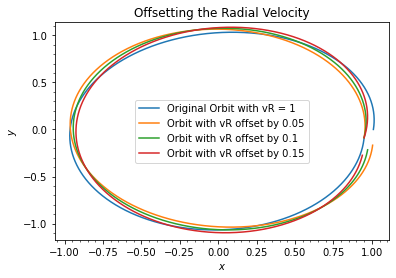

In [4]:
isop = potential.IsochronePotential(amp = 1., b = 1., normalize = 1.)

r = 1.01
vR = 0.1
vT = 1
orbit = Orbit([r, vR, vT, 0])

Tp = orbit.Tp(isop)
timestep = np.arange(0,Tp,0.001)
orbit.integrate(timestep, isop)

orbit.plot(label="Original Orbit with vR = 1")

#Offsetting

neworb = orbit(timestep[-1])
neworb.vxvv[0][1] += 0.05 #vR offset = 0.05
neworbit = Orbit(neworb.vxvv)

neworbit.integrate(timestep, isop)

neworbit.plot(overplot=True, label="Orbit with vR offset by 0.05")

neworb2 = orbit(timestep[-1])
neworb2.vxvv[0][1] += 0.1 #vR offset = 0.1
neworbit2 = Orbit(neworb2.vxvv)

neworbit2.integrate(timestep, isop)

neworbit2.plot(overplot=True, label="Orbit with vR offset by 0.1")

neworb3 = orbit(timestep[-1])
neworb3.vxvv[0][1] += 0.15 #vR offset = 0.15
neworbit3 = Orbit(neworb3.vxvv)

neworbit3.integrate(timestep, isop)

neworbit3.plot(overplot=True, label="Orbit with vR offset by 0.15")

plt.title("Offsetting the Radial Velocity")
plt.legend()

vr1isoperi = orbit.rperi()
vr01isoperi = neworbit2.rperi()[0]
vr05isoperi = neworbit3.rperi()[0]

vr1isoap = orbit.rap()
vr01isoap = neworbit2.rap()[0]
vr05isoap = neworbit3.rap()[0]

vr1isoe = orbit.e()
vr01isoe = neworbit2.e()[0]
vr05isoe = neworbit3.e()[0]

print("Pericenter Radius")
print("vR = 1, Pericenter Radius:",vr1isoperi)
print("vR += 0.1, Pericenter Radius:",vr01isoperi)
print("vR += 0.15, Pericenter Radius:",vr05isoperi)
print("")
print("Apocenter Radius")
print("vR = 1, Apocenter Radius:",vr1isoap)
print("vR += 0.1, Apocenter Radius:",vr01isoap)
print("vR += 0.15, Apocenter Radius:",vr05isoap)
print("")
print("Eccentricity")
print("vR = 1, Eccentricity:",vr1isoe)
print("vR += 0.1, Eccentricity:",vr01isoe)
print("vR += 0.15, Eccentricity:",vr05isoe)

#### Offsetting Tangential Velocity

Pericenter Radius
vT = 1, Pericenter Radius: 0.9503957648372099
vT += 0.1, Pericenter Radius: 0.9522295030830158
vT += 0.15, Pericenter Radius: 0.952561888053275

Apocenter Radius
vT = 1, Apocenter Radius: 1.0685278215971221
vT += 0.1, Apocenter Radius: 1.2171894798223275
vT += 0.15, Apocenter Radius: 1.2988283440847546

Eccentricity
vT = 1, Eccentricity: 0.05851239618659763
vT += 0.1, Eccentricity: 0.1221340731445386
vT += 0.15, Eccentricity: 0.15380117186643744


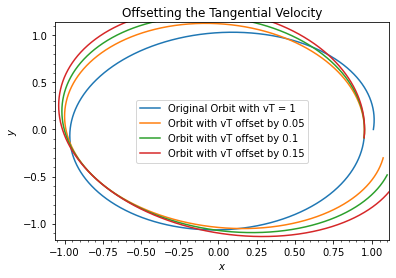

In [5]:
isop = potential.IsochronePotential(amp = 1., b = 1., normalize = 1.)

r = 1.01
vR = 0.1
vT = 1
orbit = Orbit([r, vR, vT, 0])

Tp = orbit.Tp(isop)
timestep = np.arange(0,Tp,0.001)
orbit.integrate(timestep, isop)

orbit.plot(label="Original Orbit with vT = 1")

#Offsetting

neworb = orbit(timestep[-1])
neworb.vxvv[0][2] += 0.05 #vT offset = 0.05
neworbit = Orbit(neworb.vxvv)

neworbit.integrate(timestep, isop)

neworbit.plot(overplot=True, label="Orbit with vT offset by 0.05")

neworb2 = orbit(timestep[-1])
neworb2.vxvv[0][2] += 0.1 #vT offset = 0.1
neworbit2 = Orbit(neworb2.vxvv)

neworbit2.integrate(timestep, isop)

neworbit2.plot(overplot=True, label="Orbit with vT offset by 0.1")

neworb3 = orbit(timestep[-1])
neworb3.vxvv[0][2] += 0.15 #vT offset = 0.15
neworbit3 = Orbit(neworb3.vxvv)

neworbit3.integrate(timestep, isop)

neworbit3.plot(overplot=True, label="Orbit with vT offset by 0.15")

plt.title("Offsetting the Tangential Velocity")
plt.legend()

vt1isoperi = orbit.rperi()
vt01isoperi = neworbit2.rperi()[0]
vt05isoperi = neworbit3.rperi()[0]

vt1isoap = orbit.rap()
vt01isoap = neworbit2.rap()[0]
vt05isoap = neworbit3.rap()[0]

vt1isoe = orbit.e()
vt01isoe = neworbit2.e()[0]
vt05isoe = neworbit3.e()[0]

print("Pericenter Radius")
print("vT = 1, Pericenter Radius:",vt1isoperi)
print("vT += 0.1, Pericenter Radius:",vt01isoperi)
print("vT += 0.15, Pericenter Radius:",vt05isoperi)
print("")
print("Apocenter Radius")
print("vT = 1, Apocenter Radius:",vt1isoap)
print("vT += 0.1, Apocenter Radius:",vt01isoap)
print("vT += 0.15, Apocenter Radius:",vt05isoap)
print("")
print("Eccentricity")
print("vT = 1, Eccentricity:",vt1isoe)
print("vT += 0.1, Eccentricity:",vt01isoe)
print("vT += 0.15, Eccentricity:",vt05isoe)

As can be observed, offsets to the radial and tangential velocities yield slightly results. In the case of offsetting the tangential velocity, the pericenter radius does not change by a considerable amount at all, however offsetting the radial velocity does produce more slightly more pronounced changes to the pericenter radius, but they are also only about 3-4%.

### Trying different potential:

#### Offsetting Radial Velocity with NFW Potential

Pericenter Radius
vR = 1, Pericenter Radius: 0.9455549503023281
vR += 0.1, Pericenter Radius: 1.0015722664716364
vR += 0.15, Pericenter Radius: 0.97523725212507

Apocenter Radius
vR = 1, Apocenter Radius: 1.079035471117511
vR += 0.1, Apocenter Radius: 1.0159465685330098
vR += 0.15, Apocenter Radius: 1.0441072206328341

Eccentricity
vR = 1, Eccentricity: 0.06592964157242898
vR += 0.1, Eccentricity: 0.007124742437083742
vR += 0.15, Eccentricity: 0.03410511155320892


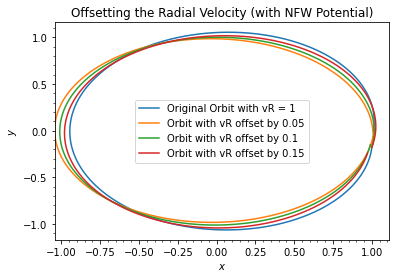

In [6]:
nfwp= NFWPotential(amp = 1., normalize = 1.)

r = 1.01
vR = 0.1
vT = 1
orbit = Orbit([r, vR, vT, 0])

Tp = orbit.Tp(nfwp)
timestep = np.arange(0,Tp,0.001)
orbit.integrate(timestep, nfwp)

orbit.plot(label="Original Orbit with vR = 1")

#Offsetting

neworb = orbit(timestep[-1])
neworb.vxvv[0][1] += 0.05 #vR offset = 0.05
neworbit = Orbit(neworb.vxvv)

neworbit.integrate(timestep, nfwp)

neworbit.plot(overplot=True, label="Orbit with vR offset by 0.05")

neworb2 = orbit(timestep[-1])
neworb2.vxvv[0][1] += 0.1 #vR offset = 0.1
neworbit2 = Orbit(neworb2.vxvv)

neworbit2.integrate(timestep, nfwp)

neworbit2.plot(overplot=True, label="Orbit with vR offset by 0.1")

neworb3 = orbit(timestep[-1])
neworb3.vxvv[0][1] += 0.15 #vR offset = 0.15
neworbit3 = Orbit(neworb3.vxvv)

neworbit3.integrate(timestep, nfwp)

neworbit3.plot(overplot=True, label="Orbit with vR offset by 0.15")

plt.title("Offsetting the Radial Velocity (with NFW Potential)")
plt.legend()

vr1nfwperi = orbit.rperi()
vr01nfwperi = neworbit2.rperi()[0]
vr05nfwperi = neworbit3.rperi()[0]

vr1nfwap = orbit.rap()
vr01nfwap = neworbit2.rap()[0]
vr05nfwap = neworbit3.rap()[0]

vr1nfwe = orbit.e()
vr01nfwe = neworbit2.e()[0]
vr05nfwe = neworbit3.e()[0]

print("Pericenter Radius")
print("vR = 1, Pericenter Radius:",vr1nfwperi)
print("vR += 0.1, Pericenter Radius:",vr01nfwperi)
print("vR += 0.15, Pericenter Radius:",vr05nfwperi)
print("")
print("Apocenter Radius")
print("vR = 1, Apocenter Radius:",vr1nfwap)
print("vR += 0.1, Apocenter Radius:",vr01nfwap)
print("vR += 0.15, Apocenter Radius:",vr05nfwap)
print("")
print("Eccentricity")
print("vR = 1, Eccentricity:",vr1nfwe)
print("vR += 0.1, Eccentricity:",vr01nfwe)
print("vR += 0.15, Eccentricity:",vr05nfwe)

#### Offsetting Tangential Velocity with NFW Potential

Pericenter Radius
vT = 1, Pericenter Radius: 0.9455549503023281
vT += 0.1, Pericenter Radius: 0.9936388657539728
vT += 0.15, Pericenter Radius: 1.0006785541805774

Apocenter Radius
vT = 1, Apocenter Radius: 1.079035471117511
vT += 0.1, Apocenter Radius: 1.2201518234645186
vT += 0.15, Apocenter Radius: 1.3189510619033271

Eccentricity
vT = 1, Eccentricity: 0.06592964157242898
vT += 0.1, Eccentricity: 0.10231904886658864
vT += 0.15, Eccentricity: 0.1372083308110502


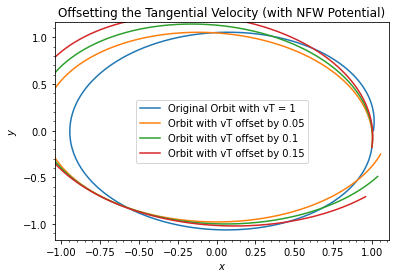

In [7]:
nfwp= NFWPotential(amp = 1., normalize = 1.)

r = 1.01
vR = 0.1
vT = 1
orbit = Orbit([r, vR, vT, 0])

Tp = orbit.Tp(nfwp)
timestep = np.arange(0,Tp,0.001)
orbit.integrate(timestep, nfwp)

orbit.plot(label="Original Orbit with vT = 1")

#Offsetting

neworb = orbit(timestep[-1])
neworb.vxvv[0][2] += 0.05 #vT offset = 0.05
neworbit = Orbit(neworb.vxvv)

neworbit.integrate(timestep, nfwp)

neworbit.plot(overplot=True, label="Orbit with vT offset by 0.05")

neworb2 = orbit(timestep[-1])
neworb2.vxvv[0][2] += 0.1 #vT offset = 0.1
neworbit2 = Orbit(neworb2.vxvv)

neworbit2.integrate(timestep, nfwp)

neworbit2.plot(overplot=True, label="Orbit with vT offset by 0.1")

neworb3 = orbit(timestep[-1])
neworb3.vxvv[0][2] += 0.15 #vT offset = 0.15
neworbit3 = Orbit(neworb3.vxvv)

neworbit3.integrate(timestep, nfwp)

neworbit3.plot(overplot=True, label="Orbit with vT offset by 0.15")

plt.title("Offsetting the Tangential Velocity (with NFW Potential)")
plt.legend()

vt1nfwperi = orbit.rperi()
vt01nfwperi = neworbit2.rperi()[0]
vt05nfwperi = neworbit3.rperi()[0]

vt1nfwap = orbit.rap()
vt01nfwap = neworbit2.rap()[0]
vt05nfwap = neworbit3.rap()[0]

vt1nfwe = orbit.e()
vt01nfwe = neworbit2.e()[0]
vt05nfwe = neworbit3.e()[0]

print("Pericenter Radius")
print("vT = 1, Pericenter Radius:",vt1nfwperi)
print("vT += 0.1, Pericenter Radius:",vt01nfwperi)
print("vT += 0.15, Pericenter Radius:",vt05nfwperi)
print("")
print("Apocenter Radius")
print("vT = 1, Apocenter Radius:",vt1nfwap)
print("vT += 0.1, Apocenter Radius:",vt01nfwap)
print("vT += 0.15, Apocenter Radius:",vt05nfwap)
print("")
print("Eccentricity")
print("vT = 1, Eccentricity:",vt1nfwe)
print("vT += 0.1, Eccentricity:",vt01nfwe)
print("vT += 0.15, Eccentricity:",vt05nfwe)

As can be observed again, we see somewhat similar results with NFW Potential, with radial velocity offsets producing slightly more considerable changes to the orbit and pericenter radius (and the changes look to be sinusodial, both increasing and decreasing with an increase in the offset), while tangential velocity offsets have some effect but not to the same extent.

### Part b

This behavior can probably be better illustrated using a diagram showing the directions of vR and vT (radial and tangential velocities). As can be seen in the diagram below, with changes to radial velocity, we're offsetting the orbit and essentially its shape, with positive offsets leading to the overall velocity vector pointing further "outwards". This would intuitively lead to more pronounced changes in the pericenter radius and the shape of the orbit. Tangential velocity offsets help speed up the orbits more, which thus has less of an effect on the pericenter radius of the orbit.

<img src="https://i.imgur.com/9wt0rLj.jpg">
Image from <a href="https://physics.stackexchange.com/questions/349811/orbital-velocity-orbital-speed-tangential-velocity">Physics Stack Exchange </a>

### Part c

In [8]:
print("For Isochrone Potential with Radial Velocity Offsets:")
print("Apocenter Radius")
print("vR = 1, Apocenter Radius:",vr1isoap)
print("vR += 0.1, Apocenter Radius:",vr01isoap,"Change in percentage:",(((vr01isoap-vr1isoap)/vr1isoap)*100),"%")
print("vR += 0.15, Apocenter Radius:",vr05isoap,"Change in percentage:",(((vr05isoap-vr1isoap)/vr1isoap)*100),"%")
print("")
print("Eccentricity")
print("vR = 1, Eccentricity:",vr1isoe)
print("vR += 0.1, Eccentricity:",vr01isoe,"Change in percentage:",(((vr01isoe-vr1isoe)/vr1isoe)*100),"%")
print("vR += 0.15, Eccentricity:",vr05isoe,"Change in percentage:",(((vr05isoe-vr1isoe)/vr1isoe)*100),"%")

print("")
print("")

print("For Isochrone Potential with Tangential Velocity Offsets:")
print("Apocenter Radius")
print("vT = 1, Apocenter Radius:",vt1isoap)
print("vT += 0.1, Apocenter Radius:",vt01isoap,"Change in percentage:",(((vt01isoap-vt1isoap)/vt1isoap)*100),"%")
print("vT += 0.15, Apocenter Radius:",vt05isoap,"Change in percentage:",(((vt05isoap-vt1isoap)/vt1isoap)*100),"%" )
print("")
print("Eccentricity")
print("vT = 1, Eccentricity:",vt1isoe)
print("vT += 0.1, Eccentricity:",vt01isoe,"Change in percentage:",(((vt01isoe-vt1isoe)/vt1isoe)*100),"%")
print("vT += 0.15, Eccentricity:",vt05isoe,"Change in percentage:",(((vt05isoe-vt1isoe)/vt1isoe)*100),"%")

print("")
print("")

print("For NFW Potential with Radial Velocity Offsets:")
print("Apocenter Radius")
print("vR = 1, Apocenter Radius:",vr1nfwap)
print("vR += 0.1, Apocenter Radius:",vr01nfwap,"Change in percentage:",(((vr01nfwap-vr1nfwap)/vr1nfwap)*100),"%")
print("vR += 0.15, Apocenter Radius:",vr05nfwap,"Change in percentage:",(((vr05nfwap-vr1nfwap)/vr1nfwap)*100),"%")
print("")
print("Eccentricity")
print("vR = 1, Eccentricity:",vr1nfwe)
print("vR += 0.1, Eccentricity:",vr01nfwe,"Change in percentage:",(((vr01nfwe-vr1nfwe)/vr1nfwe)*100),"%")
print("vR += 0.15, Eccentricity:",vr05nfwe,"Change in percentage:",(((vr05nfwe-vr1nfwe)/vr1nfwe)*100),"%")

print("")
print("")

print("For NFW Potential with Tangential Velocity Offsets:")
print("Apocenter Radius")
print("vT = 1, Apocenter Radius:",vt1nfwap)
print("vT += 0.1, Apocenter Radius:",vt01nfwap,"Change in percentage:",(((vt01nfwap-vt1nfwap)/vt1nfwap)*100),"%")
print("vT += 0.15, Apocenter Radius:",vt05nfwap,"Change in percentage:",(((vt05nfwap-vt1nfwap)/vt1nfwap)*100),"%")
print("")
print("Eccentricity")
print("vT = 1, Eccentricity:",vt1nfwe)
print("vT += 0.1, Eccentricity:",vt01nfwe,"Change in percentage:",(((vt01nfwe-vt1nfwe)/vt1nfwe)*100),"%")
print("vT += 0.15, Eccentricity:",vt05nfwe,"Change in percentage:",(((vt05nfwe-vt1nfwe)/vt1nfwe)*100),"%")

For Isochrone Potential with Radial Velocity Offsets:
Apocenter Radius
vR = 1, Apocenter Radius: 1.0685278215971221
vR += 0.1, Apocenter Radius: 1.0780346815084785 Change in percentage: 0.8897157115803042 %
vR += 0.15, Apocenter Radius: 1.100824874370705 Change in percentage: 3.022574810013711 %

Eccentricity
vR = 1, Eccentricity: 0.05851239618659763
vR += 0.1, Eccentricity: 0.06706438773557609 Change in percentage: 14.615691898355909 %
vR += 0.15, Eccentricity: 0.08708051786848629 Change in percentage: 48.824050190636775 %


For Isochrone Potential with Tangential Velocity Offsets:
Apocenter Radius
vT = 1, Apocenter Radius: 1.0685278215971221
vT += 0.1, Apocenter Radius: 1.2171894798223275 Change in percentage: 13.912755028034898 %
vT += 0.15, Apocenter Radius: 1.2988283440847546 Change in percentage: 21.553067485262446 %

Eccentricity
vT = 1, Eccentricity: 0.05851239618659763
vT += 0.1, Eccentricity: 0.1221340731445386 Change in percentage: 108.73196297593026 %
vT += 0.15, Eccentrici

As can be seen from the calculations above, radial velocity offsets don't drastically affect the apocenter radius, with changes around 0-5%, however they do affect the eccentricity of the orbits much more, as shown by the percentages above. Tangential velocity offsets, on the other hand, do affect both eccentricity and apocenter radius dramatically. In some cases, eccentricity doubles, while for apocenter radius, the changes are around 13-20% but still higher than with radial velocity offsets.

### Part d

Original Pericenter Radius: 0.9438983286441827
New Pericenter Radius: 0.9439187564092958 change in percentage: 0.0021641912580215635 %

Original Apocenter Radius: 1.0612569687342166
New Apocenter Radius: 1.0612326146169402 change in percentage: -0.002294836971055434 %


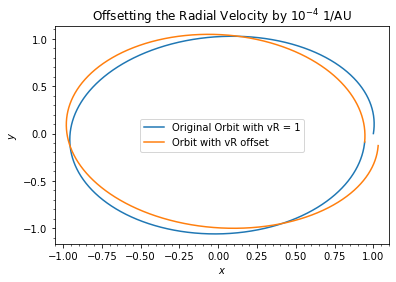

In [9]:
#Changing Radial Velocity
isop = potential.IsochronePotential(amp = 1., b = 1., normalize = 1.)

r = 1
vR = 0.1
vT = 1
orbit = Orbit([r, vR, vT, 0])

Tp = orbit.Tp(isop)
timestep = np.arange(0,Tp,0.001)
orbit.integrate(timestep, isop)

orbit.plot(label="Original Orbit with vR = 1")

#Offsetting by 10^-4

neworb = orbit(timestep[-1])
neworb.vxvv[0][1] += (10**-4) #vR offset = 10^-4
neworbit = Orbit(neworb.vxvv)

neworbit.integrate(timestep, isop)

neworbit.plot(overplot=True, label="Orbit with vR offset")


plt.title("Offsetting the Radial Velocity by $10^{-4}$ 1/AU")
plt.legend()

scottvrperi = orbit.rperi()
scottvrnewperi = neworbit.rperi()[0]

scottvrapo = orbit.rap()
scottvrnewapo = neworbit.rap()[0]

print("Original Pericenter Radius:",scottvrperi)
print("New Pericenter Radius:",scottvrnewperi, "change in percentage:",((scottvrnewperi-scottvrperi)/scottvrperi)*100,"%")
print("")
print("Original Apocenter Radius:",scottvrapo)
print("New Apocenter Radius:",scottvrnewapo, "change in percentage:",((scottvrnewapo-scottvrapo)/scottvrapo)*100,"%")

Original Pericenter Radius: 0.9438983286441827
New Pericenter Radius: 0.9439032040626567 change in percentage: 0.0005165194519468582 %

Original Apocenter Radius: 1.0612569687342166
New Apocenter Radius: 1.0613935362880755 change in percentage: 0.012868471810538218 %


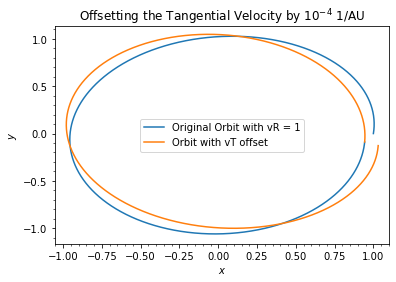

In [10]:
#Changing Tangential Velocity

isop = potential.IsochronePotential(amp = 1., b = 1., normalize = 1.)

r = 1
vR = 0.1
vT = 1
orbit = Orbit([r, vR, vT, 0])

Tp = orbit.Tp(isop)
timestep = np.arange(0,Tp,0.001)
orbit.integrate(timestep, isop)

orbit.plot(label="Original Orbit with vR = 1")

#Offsetting by 10^-4

neworb = orbit(timestep[-1])
neworb.vxvv[0][2] += (10**-4) #vR offset = 10^-4
neworbit = Orbit(neworb.vxvv)

neworbit.integrate(timestep, isop)

neworbit.plot(overplot=True, label="Orbit with vT offset")


plt.title("Offsetting the Tangential Velocity by $10^{-4}$ 1/AU")
plt.legend()

scottvtperi = orbit.rperi()
scottvtnewperi = neworbit.rperi()[0]
scottvtapo = orbit.rap()
scottvtnewapo = neworbit.rap()[0]

print("Original Pericenter Radius:",scottvtperi)
print("New Pericenter Radius:",scottvtnewperi, "change in percentage:",((scottvtnewperi-scottvtperi)/scottvtperi)*100,"%")
print("")
print("Original Apocenter Radius:",scottvtapo)
print("New Apocenter Radius:",scottvtnewapo, "change in percentage:",((scottvtnewapo-scottvtapo)/scottvtapo)*100,"%")

As can be analyzed by the given pericenter and apocenter radii for the original unpreturbed orbits and preturbed orbits, we see a change of at most 0.01%, which agrees with Scott's claim that these preturbations do not affect the orbit's pericenter (and apocenter) radii.

## Question 3

### Part a

Given: $$\frac{d}{dr}(r^{2}\frac{d\ln\rho}{dr}) = -\frac{4\pi G}{\sigma^{2}}r^{2}\rho$$

Substituting in $y = \ln\tilde{\rho}/\rho_{0}$ and $x = r/r_{0}$ we get (using the fact that $\ln\rho - \ln\rho_{0} = y$):

$$\frac{d}{dxr_{0}}((xr_{0})^{2}\frac{d(y + \ln\rho_0)}{dxr_{0}} = -\frac{4\pi G}{\sigma^{2}}(xr_{0})^{2}e^{y + \ln\rho_0}$$

Collecting constants within the derivate, simplifying the derivates, using the product rule, and substituting the value for $r^2_{0}$, we have:

$$\frac{dx^{2}}{dx}\frac{dy}{dx} + x^{2}\frac{d^{2}y}{dx^{2}} = -\frac{4\pi G}{\sigma^{2}}(\frac{9\sigma^{2}}{4\pi G \rho_{0}})x^{2}e^{y}\rho_{0}$$

Further simplification:

$$2\frac{dy}{dx} + x\frac{d^{2}y}{dx^{2}} = -9xe^{y}$$

Or:

$$\frac{d^{2}y}{dx^{2}} = \frac{-9xe^{y} - 2\frac{dy}{dx}}{x}$$

This is the equation we can use the numerical ODE solver.

Thus, we can rewrite our solution(s) to be $y = f(x)$ or $\frac{\rho}{\rho_{0}} = f(\frac{r}{r_0})$ or, simplifying: $$\rho(r) = \rho_{0}f(\frac{r}{r_0}) = \rho_{0}f(x)$$

### Part b

For the singular isothermal sphere, we have:

$$ \rho(r) = \frac{\sigma^{2}}{2\pi Gr^{2}}$$

And if we want to place $r_{0}$, we have:

$$ \rho(r) = \frac{2\rho_{0}r_{0}^{2}}{9r^{2}} $$

Further simplifying:

$$\frac{\rho(r)}{\rho_{0}} = \frac{2r_{0}^{2}}{9r^{2}}$$

Which we have for the singular isothermal sphere

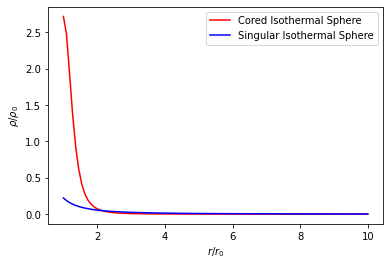

In [11]:
def coredisosphere(y,x):
    yx, h = y
    dydt = [h, (((-9)*x*(math.e**(yx))) - 2*h)/x]
    return dydt

y0 = [1,0]
x = np.linspace(1,10,100)

core = odeint(coredisosphere, y0, x)

def singular(x):
    return (2/9)*(x**(-2))
    
singulariso = []
for rr in x:
    singulariso.append(singular(rr))

plt.ylabel("$ρ/ρ_{0}}$")
plt.xlabel("$r/r_{0}$")
plt.plot(x,(math.e**core[:,0]), label = "Cored Isothermal Sphere", c = "red")
plt.plot(x,singulariso, label = "Singular Isothermal Sphere", c = "blue")
plt.legend()
plt.show()

As can be noted by the graph above, the solutions for the cored and singular isothermal spheres agree with each other and follow the same behaviour as $r/r_{0}$ increases, however for $r/r_{0} \lessapprox 3$ we see that they both start to diverge, and the cored isothermal sphere's density blows up to infinity as $r$ approaches 0.

### Part c

For the case where $\beta = 0$, the integrand in the power of the exponential is $0$, thus, we can simplify the $e$ term to $1$. Therefore, $\sigma^{2}_{r}$ reduces to just $\Phi$

For the case where $\beta = 0.5$, the integrand in the power of the exponential is $0.5\ln(r)$ from $r=300$ to $r=1$ so we have both exponentials with integrals reduce to $e^{\ln(300)}$ or simply $300$

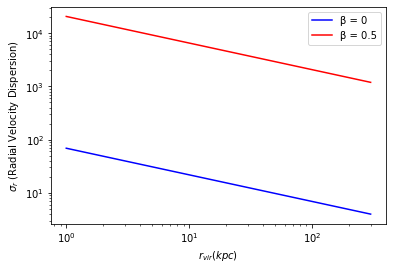

In [12]:
c = 11.5 #concentration
Mvir = 7*(10**11) #Msun
delta = 200
G = 4.3*10**-6 #kpc*(km/s)^2*Msun^-1

def p0(rvir):
    return ((delta*((3*Mvir)/(delta*4*math.pi*(rvir**3))))/3)*((c**3)/((math.log(1+c)) - (c/(1+c))))

def phi(rvir):
    return math.sqrt(4*math.pi*(((delta*((3*Mvir)/(delta*4*math.pi*(rvir**3))))/3)*((c**3)/((math.log(1+c)) - (c/(1+c)))))*G*((rvir**2)/(c**3))*math.log(1+c))

def sigrB0(r):
    return phi(r)

def sigrB5(r):
    return 300*phi(r)

rad = []
for i in range(1,301):
    rad.append(i)
    i += 0.5
    
sigB0 = []
sigB5 = []
for radius in rad:
    sigB0.append(sigrB0(radius*(10**3)))
    sigB5.append(sigrB5(radius*(10**3)))


plt.plot(rad,sigB0, label="β = 0", color= "blue")
plt.plot(rad,sigB5, label="β = 0.5", color= "red")


plt.xlabel("$r_{vir} (kpc) $")
plt.ylabel("$σ_{r}$ (Radial Velocity Dispersion)")

plt.xscale("log")
plt.yscale("log")

plt.legend()
plt.show()
    

### Part d

In [13]:
sigmam = 1 #m^2g^-1

timeconst = 3.16*10**16 #s

def psiso(r):
    return (2*p0(r))/(9*r)

gammaB0 = []
for ra in rad:
    gammaB0.append(psiso(ra*(10**3))*sigmam*sigrB0(ra)*(4/math.sqrt(math.pi)))

indexB0 = min(range(len(gammaB0)), key=lambda i: abs(gammaB0[i]-1))

gammaB5 = []
for ra in rad:
    gammaB5.append(psiso(ra*(10**3))*sigmam*sigrB5(ra)*(4/math.sqrt(math.pi)))

indexB5 = min(range(len(gammaB5)), key=lambda i: abs(gammaB5[i]-1))

print("For β = 0, the radius at which particle in the NFW halo is expected to scatter once is:",rad[indexB0],"kpc")
print("For β = 0.5, the radius at which particle in the NFW halo is expected to scatter once is:",rad[indexB5],"kpc")

For β = 0, the radius at which particle in the NFW halo is expected to scatter once is: 11 kpc
For β = 0.5, the radius at which particle in the NFW halo is expected to scatter once is: 41 kpc


### Part e

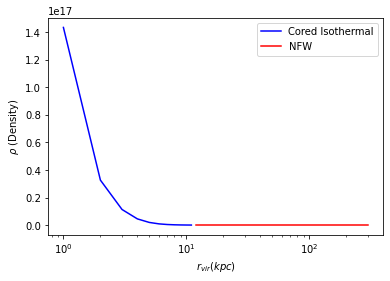

In [14]:
r1b0 = rad[indexB0]

arrayee = math.e**core[:,0]
corediso = []
for ce in arrayee:
    corediso.append(ce)

def nfwprof(r):
    return (p0(r))/(c*((1+c)**2))

latergraph = []
firstgraph = []
i = 0
for ra in rad:
    if (ra<=r1b0):
        firstgraph.append(corediso[i]*(ra*10**3)*(p0(ra)))
        i += 1
    else:
        latergraph.append(nfwprof(ra*10**3))

firstrad = rad[:r1b0]
secondrad = rad[r1b0:]

plt.plot(firstrad,firstgraph, label="Cored Isothermal", color= "blue")
plt.plot(secondrad,latergraph, label="NFW", color= "red")

plt.xlabel("$r_{vir} (kpc) $")
plt.ylabel("$ρ$ (Density)")

plt.xscale("log")

plt.legend()
plt.show()